In [0]:
# import some python libraries
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rcParams

%matplotlib inline

In [18]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.8).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
# maybe run through some simple stress strain relationships?
# super basic, stress strain equation. Nothing fancy. sigma is 
# stress, epsilon is strain and E is youngs modulus
def stress(E):
    epsilon = np.arange(40)
    sigma = E * epsilon
    
    #plt.plot(sigma, epsilon)
    #plt.show()
    
stress(20)

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

d = np.random.randint(0, 2, size=(30,30,30))
z,x,y = d.nonzero()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, -z, zdir='z', c= 'red', alpha = .07)
plt.show()

In [0]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import pandas as pd
import numpy as np

# Here you generate some dummy data then you store it in a Pandas data frame/
# dictionary
a = np.random.rand(2000, 3)
t = np.array([np.ones(100)*i for i in range(20)]).flatten()
df = pd.DataFrame({"time": t ,"x" : a[:,0], "y" : a[:,1], "z" : a[:,2]})

# Here you just plot one set of points at a time
def update_graph(num):
    data=df[df['time']==num]
    graph._offsets3d = (data.x, data.y, data.z)
    title.set_text('3D Test, time={}'.format(num))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', alpha = .07)
title = ax.set_title('3D Test')

data=df[df['time']==0]
graph = ax.scatter(data.x, data.y, data.z, alpha = .07)

ani = matplotlib.animation.FuncAnimation(fig, update_graph, 9, 
                               interval=200, blit=False)
ani.save('test.gif', writer='imagemagick')
plt.show()

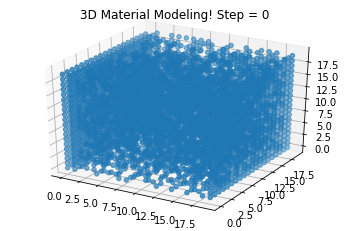

In [32]:
#set up our matrix
N = 20
Material = np.random.randint(0, 2, size = (N,N,N))
x, y, z = Material.nonzero()

def start():
  N = 20
  Material = np.random.randint(0, 2, size = (N,N,N))
  x, y, z = Material.nonzero()

#this function models how a defect moves through a materail
def material_shift():
    # Make a copy out of our matrix that 
    # we can make changes to
    Movement = Material.copy()

    #do stuff i can explain to you. or not. life's short.
    for i in range(N):
      for j in range(N):
        for k in range(N):
          if Material[(i-1)%N, j, k] == 0: 
            Material[(i-1)%N, j, k], Material[i,j,k] = 1, 0
          if Material[i, (j-1)%N, k] == 0:
            Material[i, (j-1)%N, k], Material[i,j,k] = 1, 0
          if Material[i, j, (k-1)%N] == 0:
            Material[i, j, (k-1)%N], Material[i,j,k] = 1, 0
          if Material[(i+1)%N, j, k] == 0:
            Material[(i+1)%N, j, k], Material[i,j,k] = 1, 0
          if Material[i, (j+1)%N, k] ==0:
            Material[i, (j+1)%N, k], Material[i,j,k] = 1, 0
          if Material[i, j, (k+1)%N] == 0:
            Material[i, j, (k+1)%N], Material[i,j,k] = 1, 0
      # Finally update our old matrix
      Material = Movement

      # Done!
      return Material

# Here you just plot one set of points at a time
def updateGraph(num, Material):
    data = material_shift(Material)
    x, y, z = data.nonzero()
    graph._offsets3d = (x, y, z)
    title.set_text('3D Material Modeling! Step = {}'.format(num))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Material Modeling!')

graph = ax.scatter(x, y, z)

ani = matplotlib.animation.FuncAnimation(fig, updateGraph, frames = 20, fargs = (Material,), interval=20, blit=False)
ani.save('func_test.gif', writer='imagemagick')
plt.show()
# So i think whats happening here is that the same initial matrix is getting passed in over and over so the same image keeps getting plotted

In [0]:
'''
 import some python libraries for 3d 
 plotting
'''

import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

# Create a figure and a Plot element
fig = plt.figure()
ax = p3.Axes3D(fig)

# Set up a 3 dimensional matrix that will be our "matrix"
N = 3
Material = np.random.randint(0, 2, size = (N,N,N))

# this function will calculate how a defect can move through 
# a material
'''
so what kind of data structure is best to store this set of points?
what we really want is a 4 column structure. 1 for the time interval
and the other 3 for x, y, and z. the issue here is we dont know what the step 
after 0 will look like. so maybe a good idea is to do all the calculations, and
store the results in a dataframe? then update? yeah that might sound goood.

'''
def material_shift():

    Movement = Material.copy()

    for i in range(N):
      for j in range(N):
        for k in range(N):
          if Material[(i-1)%N, j, k] == 0: 
            Material[(i-1)%N, j, k], Material[i,j,k] = 1, 0
          if Material[i, (j-1)%N, k] == 0:
            Material[i, (j-1)%N, k], Material[i,j,k] = 1, 0
          if Material[i, j, (k-1)%N] == 0:
            Material[i, j, (k-1)%N], Material[i,j,k] = 1, 0
          if Material[(i+1)%N, j, k] == 0:
            Material[(i+1)%N, j, k], Material[i,j,k] = 1, 0
          if Material[i, (j+1)%N, k] ==0:
            Material[i, (j+1)%N, k], Material[i,j,k] = 1, 0
          if Material[i, j, (k+1)%N] == 0:
            Material[i, j, (k+1)%N], Material[i,j,k] = 1, 0

      Material = Movement

def update(num, data, matrix):
    matrix.set_data(data[:2, :num])
    print(data[:2, ])
    matrix.set_3d_properties(data[2, :num])

F = 100
data = material_shift(N, Material) 
matrix = ax.scatter(data[0], data[1], data[2])

print(data[:2, :100])
# Setting the axes properties
ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ani = animation.FuncAnimation(fig, update, F, fargs=(data, line), interval=10000/N, blit=False)
#ani.save('material.gif', writer='imagemagick')
plt.show()

